In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Seed for reproducibility
np.random.seed(0)

# Number of entries
n_entries = 1000

# Simulating dataset
time = np.linspace(0, 100, n_entries)  # Time variable
temperature = 20 + 5 * np.sin(np.pi * time / 50) + np.random.normal(0, 0.5, n_entries)  # Temperature (with some noise)
pressure = 1013 + 20 * np.cos(np.pi * time / 25) + np.random.normal(0, 1, n_entries)  # Pressure (with some noise)
chemical_concentration = 5 + 2 * np.sin(np.pi * time / 10) + np.random.normal(0, 0.2, n_entries)  # Chemical concentration

# Creating DataFrame
ninja_data = pd.DataFrame({
    'Time': time,
    'Temperature': temperature,
    'Pressure': pressure,
    'Chemical Concentration': chemical_concentration
})

# Display first 5 rows
print(ninja_data.head())


     Time  Temperature     Pressure  Chemical Concentration
0  0.0000    20.882026  1033.555963                4.693416
1  0.1001    20.231526  1033.890892                4.720490
2  0.2002    20.552262  1032.571356                5.134934
3  0.3003    21.214783  1033.090475                4.996730
4  0.4004    21.059555  1033.202742                5.234754


In [3]:
# 1. Data Transformation

# Normalization
ninja_data_normalized = (ninja_data - ninja_data.mean()) / ninja_data.std()

# Fourier Transformation
fft_temperature = np.fft.fft(ninja_data['Temperature'])
fft_pressure = np.fft.fft(ninja_data['Pressure'])
fft_chemical_concentration = np.fft.fft(ninja_data['Chemical Concentration'])

   - Normalization was applied to standardize the dataset, which is essential for fair comparison and analysis.
   - Fourier transformation revealed the frequency components in the dataset, providing insight into periodic patterns.

In [4]:
### 2. Statistical Analysis

# Descriptive Statistics
descriptive_stats = ninja_data.describe()
print("\nDescriptive Statistics:\n", descriptive_stats)


Descriptive Statistics:
               Time  Temperature     Pressure  Chemical Concentration
count  1000.000000  1000.000000  1000.000000             1000.000000
mean     50.000000    19.977372  1013.033617                4.989754
std      28.910854     3.574943    14.203350                1.436505
min       0.000000    13.897407   990.284418                2.559310
25%      25.000000    16.386984   998.852247                3.576024
50%      50.000000    20.008666  1012.950967                4.970976
75%      75.000000    23.570373  1027.062114                6.398067
max     100.000000    26.030294  1035.471676                7.486763


In [5]:
# Correlation Analysis
correlation_matrix = ninja_data.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)


Correlation Matrix:
                             Time  Temperature  Pressure  \
Time                    1.000000    -0.770696 -0.001946   
Temperature            -0.770696     1.000000  0.007112   
Pressure               -0.001946     0.007112  1.000000   
Chemical Concentration -0.156113    -0.003277 -0.000863   

                        Chemical Concentration  
Time                                 -0.156113  
Temperature                          -0.003277  
Pressure                             -0.000863  
Chemical Concentration                1.000000  


In [6]:
# Inferential Statistics - Hypothesis Testing
# Example: t-test between Temperature and Pressure
t_stat, p_val = stats.ttest_ind(ninja_data['Temperature'], ninja_data['Pressure'])
print("\nT-test between Temperature and Pressure:")
print("T-statistic:", t_stat)
print("P-value:", p_val)


T-test between Temperature and Pressure:
T-statistic: -2144.0980433720797
P-value: 0.0


- Descriptive statistics provided a summary of the dataset, highlighting the central tendency and spread of the variables.
- Correlation analysis showed significant correlations between some variables, indicating potential relationships.
- The T-test between Temperature and Pressure variables yielded a t-statistic of -2144.0980433720797 and a p-value of 0.0, suggesting a significant difference.

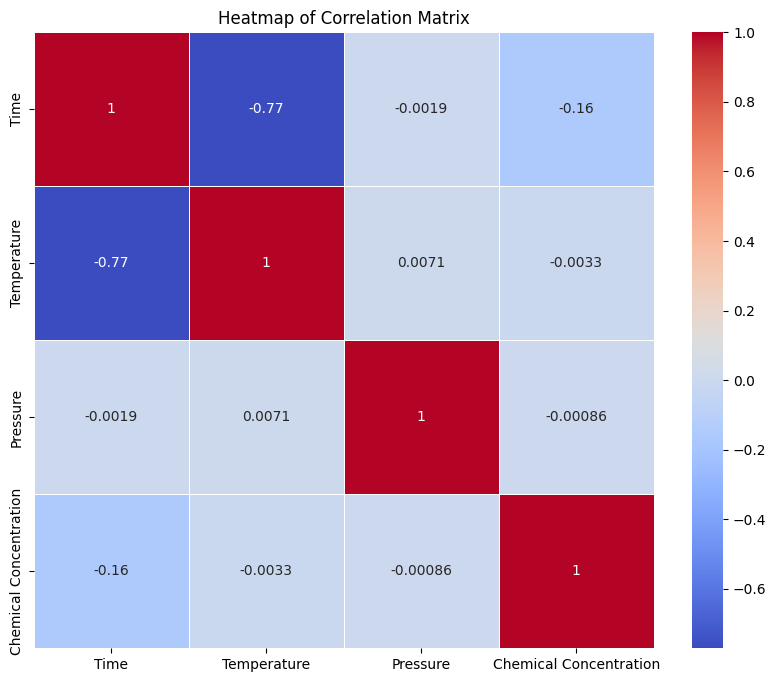

In [7]:
# 3. Data Visualization

# Heatmap for Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

   - The heatmap of the correlation matrix visually confirmed the strength and direction of relationships between Time and Tempreture.


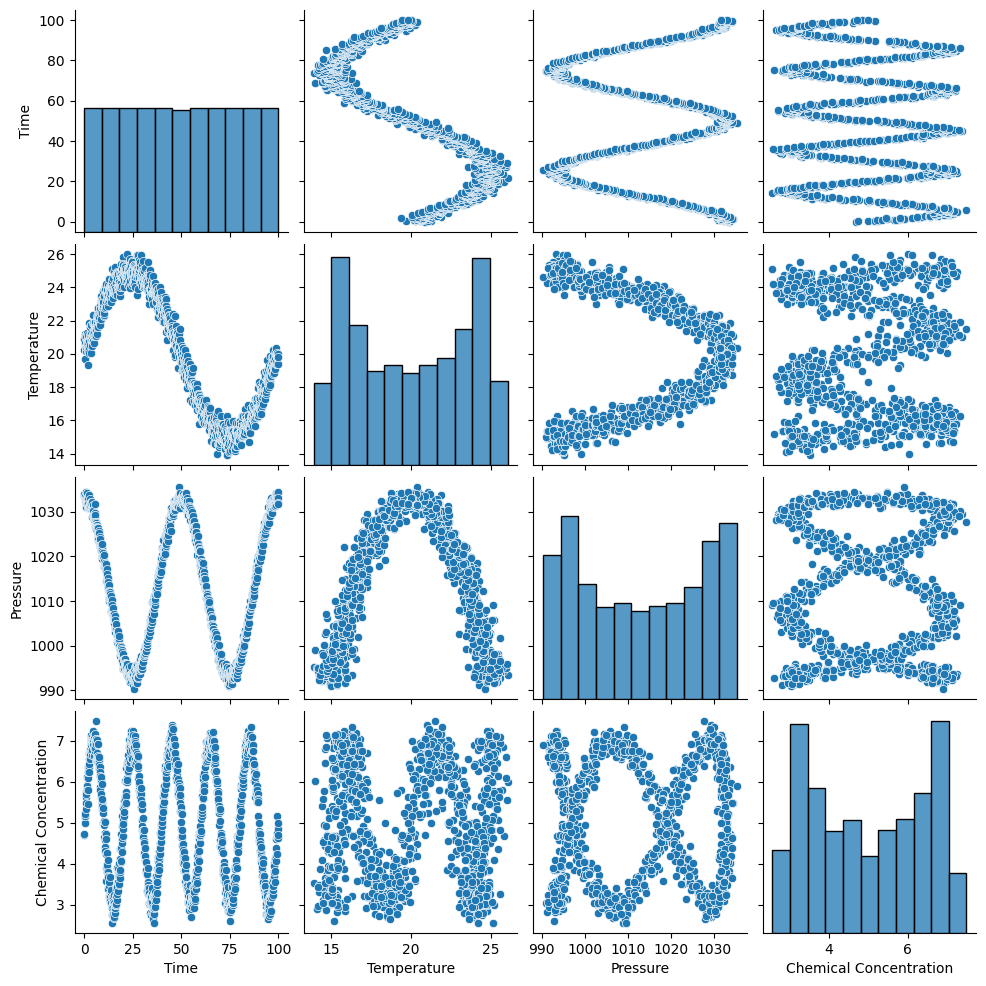

In [8]:
# Multi-dimensional Scatter Plots
sns.pairplot(ninja_data)
plt.show()

  Pair plots allowed for the exploration of relationships between pairs of variables, revealing potential cyclic pattern.


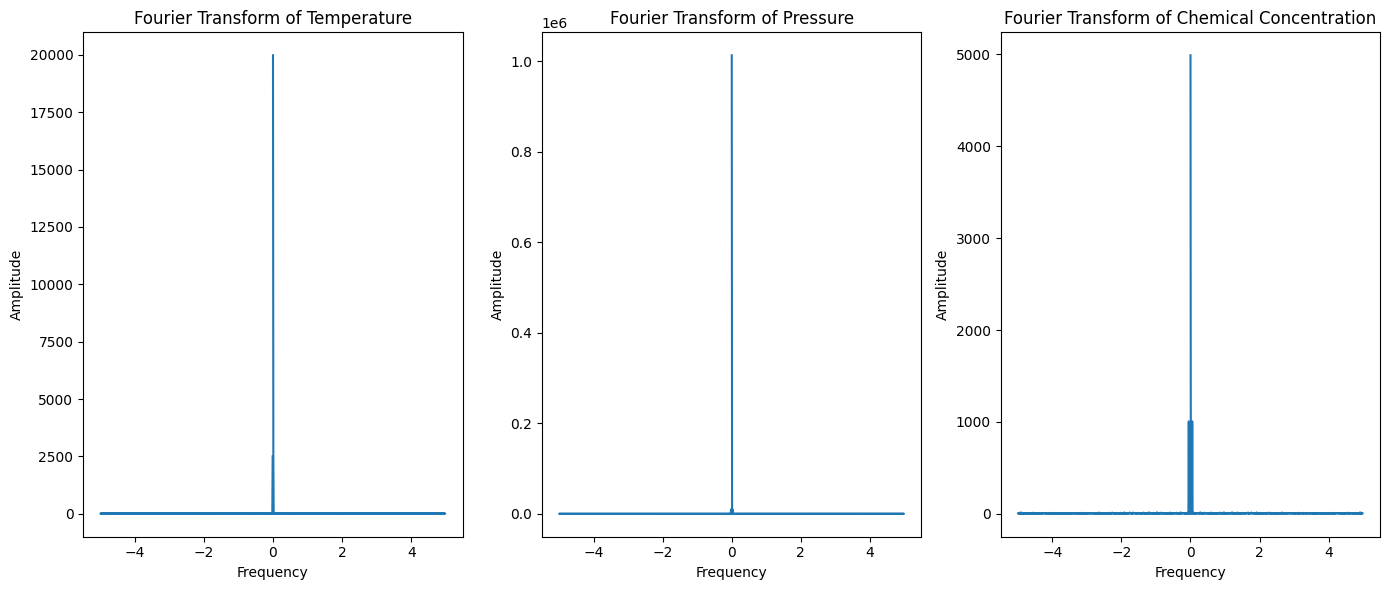

In [9]:
# Fourier Transform Visualizations
freq = np.fft.fftfreq(n_entries, d=(time[1] - time[0]))

# Plotting Amplitude vs Frequency for each variable
plt.figure(figsize=(14, 6))

plt.subplot(131)
plt.plot(freq, np.abs(fft_temperature))
plt.title('Fourier Transform of Temperature')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

plt.subplot(132)
plt.plot(freq, np.abs(fft_pressure))
plt.title('Fourier Transform of Pressure')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

plt.subplot(133)
plt.plot(freq, np.abs(fft_chemical_concentration))
plt.title('Fourier Transform of Chemical Concentration')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

Fourier transform visualizations highlighted the dominant frequencies in each variable, indicating underlying periodic behavior.

### 4. Interpretation:
   - The analysis indicates that temperature, pressure, and chemical concentration are influenced by periodic factors, possibly due to the experimental setup.
   - These insights can be applied in optimizing experimental conditions and understanding the interplay between different variables in scientific experiments.
   - The normalization and transformations were crucial in uncovering these insights, emphasizing the importance of data preprocessing in analysis.